In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [7]:
df.groupby('DEATH_EVENT').mean()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
DEATH_EVENT,,,,,,,,,,,,
0,58.761906,0.408867,540.054187,0.418719,40.26601,0.325123,266657.489901,1.184877,137.216749,0.650246,0.325123,158.339901
1,65.215281,0.479167,670.197917,0.416667,33.46875,0.406250,256381.044792,1.835833,135.375000,0.645833,0.312500,70.885417


In [8]:
df.drop(columns=['anaemia', 'diabetes', 'platelets', 'serum_sodium', 'smoking'], inplace=True)
df.head()

,age,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,serum_creatinine,sex,time,DEATH_EVENT
0,75.0,582,20,1,1.9,1,4,1
1,55.0,7861,38,0,1.1,1,6,1
2,65.0,146,20,0,1.3,1,7,1
3,50.0,111,20,0,1.9,1,7,1
4,65.0,160,20,0,2.7,0,8,1


In [9]:
X = df.drop(columns=['DEATH_EVENT'])
y = df['DEATH_EVENT']

In [10]:
scaler = MinMaxScaler()
X[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'serum_creatinine', 'time']] = scaler.fit_transform(X[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'serum_creatinine', 'time']])
X.head()

,age,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,serum_creatinine,sex,time
0,0.636364,0.071319,0.090909,1,0.157303,1,0.000000
1,0.272727,1.000000,0.363636,0,0.067416,1,0.007117
2,0.454545,0.015693,0.090909,0,0.089888,1,0.010676
3,0.181818,0.011227,0.090909,0,0.157303,1,0.010676
4,0.454545,0.017479,0.090909,0,0.247191,0,0.014235


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model1 = DecisionTreeClassifier(criterion='gini')
model1.fit(X_train, y_train)

model2 = DecisionTreeClassifier(criterion='gini', ccp_alpha=0.015)
model2.fit(X_train, y_train)

model3 = DecisionTreeClassifier(criterion='entropy')
model3.fit(X_train, y_train)

model4 = DecisionTreeClassifier(criterion='entropy', ccp_alpha=0.015)
model4.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.015, criterion='entropy')

In [13]:
y_pred1 = model1.predict(X_test)
train_acc1 = model1.score(X_train, y_train)
test_acc1 = accuracy_score(y_test, y_pred1)

y_pred2 = model2.predict(X_test)
train_acc2 = model2.score(X_train, y_train)
test_acc2 = accuracy_score(y_test, y_pred2)

y_pred3 = model3.predict(X_test)
train_acc3 = model3.score(X_train, y_train)
test_acc3 = accuracy_score(y_test, y_pred3)

y_pred4 = model4.predict(X_test)
train_acc4 = model4.score(X_train, y_train)
test_acc4 = accuracy_score(y_test, y_pred4)

print(f'Using Gini without pruning:\nTraining Accuracy: {train_acc1}\nTesting Accuracy: {test_acc1}\n')
print(f'Using Gini with pruning:\nTraining Accuracy: {train_acc2}\nTesting Accuracy: {test_acc2}\n')
print(f'Using Entropy without pruning:\nTraining Accuracy: {train_acc3}\nTesting Accuracy: {test_acc3}\n')
print(f'Using Entropy with pruning:\nTraining Accuracy: {train_acc4}\nTesting Accuracy: {test_acc4}')

Using Gini without pruning:
Training Accuracy: 1.0
Testing Accuracy: 0.7

Using Gini with pruning:
Training Accuracy: 0.8870292887029289
Testing Accuracy: 0.7

Using Entropy without pruning:
Training Accuracy: 1.0
Testing Accuracy: 0.7333333333333333

Using Entropy with pruning:
Training Accuracy: 0.9288702928870293
Testing Accuracy: 0.7833333333333333


In [14]:
x = int(test_acc4 * len(y_test))
y = len(y_test) - x

print(f'Correct Classifications: {x}\nWrong Predictions: {y}')

Correct Classifications: 47
Wrong Predictions: 13


In [15]:
print(f'Correctly Predict: {x} Out {len(y_test)}')

Correctly Predict: 47 Out 60


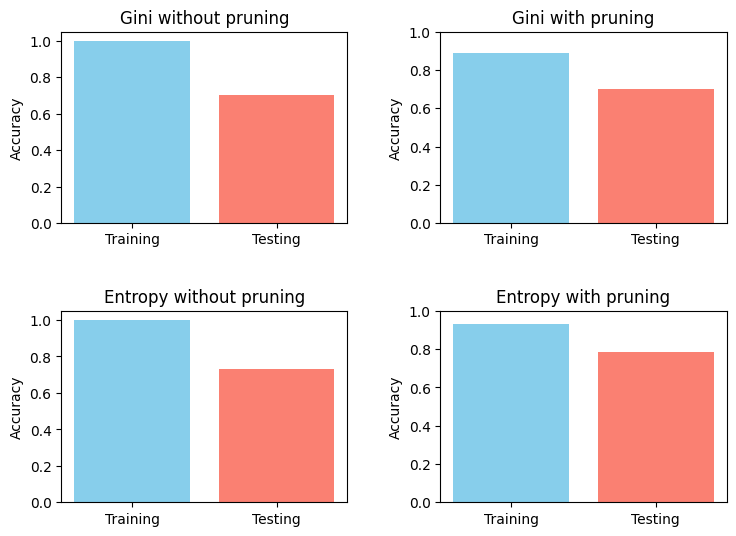

In [18]:
labels = ['Training', 'Testing']

plt.figure(figsize=(8, 6))

plt.subplot(2, 2, 1)
plt.bar(labels, [train_acc1, test_acc1], color=['skyblue', 'salmon'])
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.ylabel('Accuracy')
plt.title('Gini without pruning')

plt.subplot(2, 2, 2)
plt.bar(labels, [train_acc2, test_acc2], color=['skyblue', 'salmon'])
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.ylabel('Accuracy')
plt.title('Gini with pruning')

plt.subplot(2, 2, 3)
plt.bar(labels, [train_acc3, test_acc3], color=['skyblue', 'salmon'])
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.ylabel('Accuracy')
plt.title('Entropy without pruning')

plt.subplot(2, 2, 4)
plt.bar(labels, [train_acc4, test_acc4], color=['skyblue', 'salmon'])
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.ylabel('Accuracy')
plt.title('Entropy with pruning')

plt.tight_layout(pad=3)
plt.show()